# Plot Maker
- creating some plots to use for documentation
- normally I'd just include the notebook and code
- but for more of a graphic to use in Markdown, the code might not be relevant

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
# set the directory to save images to
this_dir = Path().resolve()
img_dir = this_dir.parent / "docs" / "source" / "images"
if img_dir.is_dir():
    print(f"images will be saved to: {img_dir}")
else:
    raise FileNotFoundError(f"image save directory not found: {img_dir}")

images will be saved to: C:\Users\gillm\VisualStudioCode\aiml-notes\docs\source\images


## R-Squared

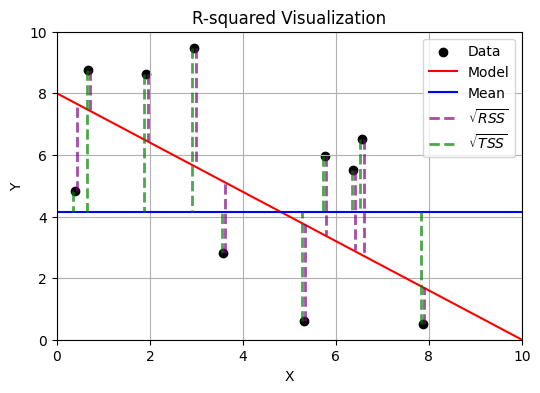

In [3]:
# Generate random scatter points
np.random.seed(17)
x = np.random.rand(10) * 10
y = np.random.rand(10) * 10


# make a function to use as a "model"
def model(x):
    return 8 - 0.8 * x


# Plot scatter points
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", label="Data")

# Add two lines
x_line = np.linspace(0, 1, 10) * 10
y_modl = model(x_line)
y_mean = np.array([x.mean() for xi in x_line])
plt.plot(x_line, y_modl, color="red", label="Model")
plt.plot(x_line, y_mean, color="blue", label="Mean")

# Add vertical lines from each scatter point to the first line
y1_label = r"$\sqrt{RSS}$"
y2_label = r"$\sqrt{TSS}$"
for xi, yi in zip(x, y):
    # find the point above or below the scatter point on each line
    y_vert_modl = model(xi)
    y_vert_mean = x.mean()
    # plot the vertical line (shift them so they don't overlap)
    plt.plot(
        [xi + 0.035, xi + 0.035],
        [yi, y_vert_modl],
        color="purple",
        linestyle="--",
        alpha=0.7,
        label=y1_label,
        linewidth=2,
    )
    plt.plot(
        [xi - 0.035, xi - 0.035],
        [yi, y_vert_mean],
        color="green",
        linestyle="--",
        alpha=0.7,
        label=y2_label,
        linewidth=2,
    )
    # only label the first vertical line to keep from crowding the legend
    y1_label = None
    y2_label = None

# add some labels and a legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("R-squared Visualization")
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)

# show and save the figure
plt.savefig(img_dir / "r_squared_visualization.png")
plt.show()

## RMSE and RMSLE

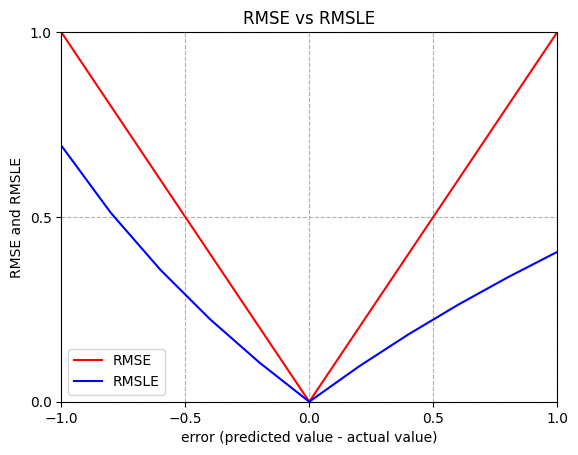

In [4]:
def RMSE(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


def RMSLE(y_true, y_pred):
    """Calculate Root Mean Squared Logarithmic Error."""
    return np.sqrt(np.mean((np.log(y_true + 1) - np.log(y_pred + 1)) ** 2))
    # the correct way to calculate RMSLE is to use log1p to improve precision when y is small
    # but that's less clear so I'm skipping it for this illustration
    # return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))


# generate input data
y_true = [1] * 11  # true will be horizontal
y_pred = np.linspace(0, 2, 11)  # predicted will be sometimes under and sometimes over
# calculate the error
err = y_pred - y_true
# caclulate RMSE and RMSLE
rmse = [RMSE(t, p) for t, p in zip(y_true, y_pred)]
rmsle = [RMSLE(t, p) for t, p in zip(y_true, y_pred)]

# Plot the errors
# plt.plot(err, y_true, color='green', label='actual value')
# plt.plot(err, y_pred, color='purple', label='predicted value')
plt.plot(err, rmse, color="red", label="RMSE")
plt.plot(err, rmsle, color="blue", label="RMSLE")

# add some labels and a legend
plt.xlabel("error (predicted value - actual value)")
plt.ylabel("RMSE and RMSLE")
plt.title("RMSE vs RMSLE")
plt.legend()
plt.grid(which="both", linestyle="--")
plt.xlim(-1, 1)
plt.ylim(0, 1)
# plt.xticks(np.arange(-1, 1.1, 0.1), minor=True)
plt.xticks(np.arange(-1, 1.1, 0.5))
plt.yticks(np.arange(0, 1.1, 0.5))

# show and save the figure
plt.savefig(img_dir / "rmse_vs_rmsle.png")
plt.show()

## Confusion Matrix
- table in machine learning to evaluate performance of a classification model
- for binary classification (2 possible categories), produces 2x2 square
- makes an NxN square where N is the number of categories
- the table means this (analogous to the True Positive etc stuff but that was when you were predicting True/False instead of labels likek Cat/Ant):

| | Predicted as Ant | Predicted as Cat |
| --- | --- | --- |
| Actually was Ant | Correct Ant Prediction | Incorrect Ant Prediction |
| Actually was Cat | Incorrect Cat Prediction | Correct Cat Prediction  |

[[2 0]
 [1 3]]


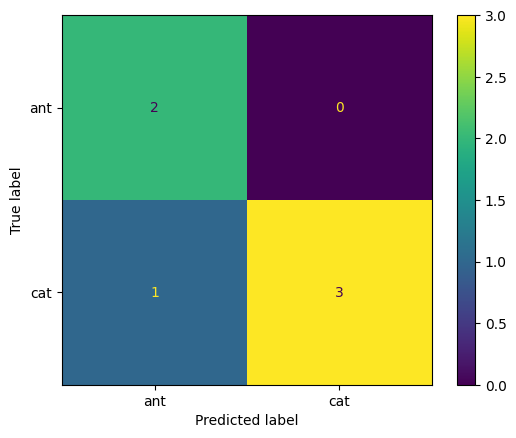

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = ["cat", "ant", "cat", "cat", "ant", "cat"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
cm = confusion_matrix(y_true, y_pred, labels=["ant", "cat"])
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=["ant", "cat"])
disp.plot()
disp.figure_.savefig(img_dir / "confusion_matrix.png")

## Activation Functions
Create the actual activation functions

In [6]:
# Set the default font family for all text on all following plots
# monospace will use fonts with all characters same width
plt.rcParams['font.family'] = 'monospace'

In [7]:
# define activation functions
def linear(x,m,b): # linear activation function. Basically straight line slope-intercept
    return m * x + b
def identity(x): # specific linear activation function b=0, m=1, just returns the input
    return x
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )
def swish(x): # aka Sigmoid Linear Unit (SiLU)
    return x * sigmoid(x)
def tanh(x):
    return np.tanh(x)
def tanh_imp(x): # improved hyperbolic tangent from deep autoencoder paper https://arxiv.org/pdf/2010.05698.pdf
    return np.tanh(x * np.pi / 2)
def relu(x):
    return max(0, x)
def gelu(x): # gaussian error linear unit (uses "erf" gaussian error function)
    return (1/2) * x * (1 + math.erf(x / math.sqrt(2)))
def leaky_relu(x, alpha=0.01): # alpha is typically 0.01-0.3)
    return max(alpha*x, x)
def sin(x): # sinusoid, a periodic activation function
    return math.sin(x)

# define a list of of of x-values
min_x = -4
max_x =  4
step = 0.25
inputs = [x for x in np.arange(min_x, max_x + step, step)]

# calculate a list of y-values for each function at all of the x-values
outs_sigmoid    = [sigmoid(x)              for x in inputs]
outs_swish      = [swish(x)                for x in inputs]
outs_tanh       = [tanh(x)                 for x in inputs]
outs_tanh_imp   = [tanh_imp(x)             for x in inputs]
outs_relu       = [relu(x)+0.05            for x in inputs] # offset vertically to not overlap with x-axis
outs_gelu       = [gelu(x)                 for x in inputs]
outs_leaky_relu = [leaky_relu(x,0.014)-0.01     for x in inputs] # offset and increase alpha to show trend, not overlap with ReLU
outs_sin        = [sin(x)                  for x in inputs]

In [8]:
# define derivatives
def sigmoid_d(x):
    return sigmoid(x) * ( 1 - sigmoid(x) )
def sigmoid_dd(x):
    return sigmoid(x) * ( 1 - sigmoid(x) ) ** 2 - sigmoid(x) ** 2 * ( 1 - sigmoid(x) )
def sigmoid_ddd(x):
    return sigmoid(x) * ( 1 - sigmoid(x) ) ** 3 - 4 * sigmoid(x) ** 2 * ( 1 - sigmoid(x) ) ** 2 + sigmoid(x) ** 3 * ( 1 - sigmoid(x) )
def swish_d(x):
    return swish(x) + ( sigmoid(x) * ( 1 - swish(x) ) )
def relu_d(x):
    return 0 if x < 0 else 1
def leaky_relu_d(x):
    return 0.01 if x < 0  else 1

# calculate a list of y-values for each derivative function at all of the x-values
outs_sigmoid_d    = [sigmoid_d(x)     for x in inputs]
outs_sigmoid_dd   = [sigmoid_dd(x)    for x in inputs]
outs_sigmoid_ddd  = [sigmoid_ddd(x)   for x in inputs]
outs_swish_d      = [swish_d(x)       for x in inputs]
outs_relu_d       = [relu_d(x)        for x in inputs]
outs_leaky_relu_d = [leaky_relu_d(x)  for x in inputs]

In [9]:
# define some useful shorthand for 
w = 3
g = 'green'
b = 'blue'
r = 'red'
o = 'orange'
p = 'purple'

### Various Activation Functions
plot a selection of activation functions without their derivatives

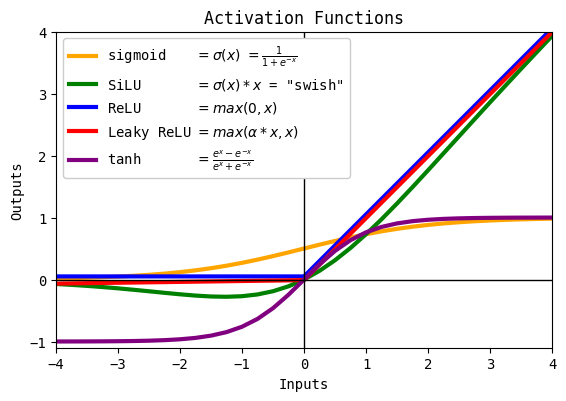

In [10]:
# create separate figure and axes objects to control tickmarks
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# add functions and markdown equations, align equal signs, make thicker
plt.plot(inputs, outs_sigmoid,    lw=w, c=o,   label=r"sigmoid   $~=\sigma(x) ~= \frac{1}{1+e^{-x}}$")
plt.plot(inputs, outs_swish,      lw=w, c=g,   label=r'SiLU      $~=\sigma(x)*x$ = "swish"')
plt.plot(inputs, outs_relu,       lw=w, c=b,   label=r"ReLU      $~=max(0,x)$")
plt.plot(inputs, outs_leaky_relu, lw=w, c=r,   label=r"Leaky ReLU$~=max(\alpha*x,x)$")
plt.plot(inputs, outs_tanh,       lw=w, c=p,   label=r"tanh      $~=\frac{e^x-e^{-x}}{e^x+e^{-x}}$")
#plt.plot(inputs, outs_gelu,       lw=w, color='y', label=r"GELU      $~=\frac{1}{2}x\left(1+erf\left(\frac{x}{\sqrt{2}}\right)\right)$")
#plt.plot(inputs, outs_sin,        lw=w, color='k', label=r"sinusoid  $~=sin(x)$")

# add horizontal and vertical lines
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

# make the axes square so 1 on x axis is same length as 1 on the y-axis
plt.axis('square')

# set limits
max_y = 4
plt.xlim(min_x, max_x)
plt.ylim(-1.1,  max_y)

# set the ticklabels and remove the 0,0 labels
ax.xaxis.set_ticks([i for i in list(range(min_x, max_x+1))])
ax.yaxis.set_ticks([i for i in list(range(-1,    max_y+1))])

# locate the legend and make it fully opaque so the y-axis doesn't show through
plt.legend(loc="upper left", framealpha=1.0)

# add labels and show the plot
plt.ylabel("Outputs")
plt.xlabel("Inputs")
plt.title("Activation Functions")
plt.savefig(img_dir / "activation_functions.png")
plt.show()

### Sigmoid and Squish Formulas and Derivatives

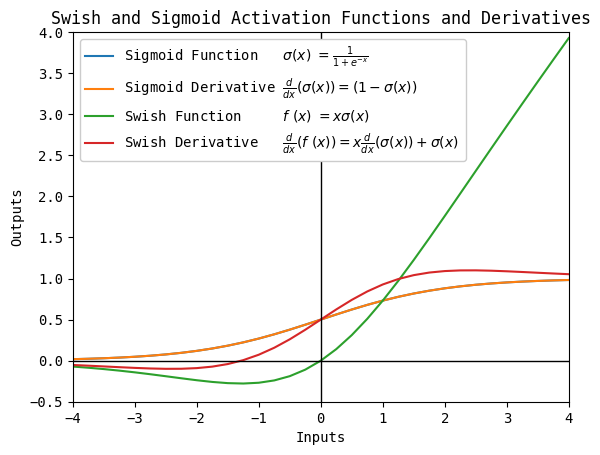

In [11]:
# add functions, derivatives, and equations to the plot
plt.plot(inputs, outs_sigmoid, label=r"Sigmoid Function   $\sigma(x)~=\frac{1}{1+e^{-x}}$")
plt.plot(inputs, outs_sigmoid, label=r"Sigmoid Derivative $\frac{d}{dx}(\sigma(x))=(1-\sigma(x))$")
plt.plot(inputs, outs_swish,   label=r"Swish Function     $f~(x)~=x\sigma(x)$")
plt.plot(inputs, outs_swish_d,   label=r"Swish Derivative   $\frac{d}{dx}(f~(x))=x\frac{d}{dx}(\sigma(x))+\sigma(x)$ ")
 
# add horizontal and vertical lines
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
 
# set limits
plt.xlim(min_x,max_x)
plt.ylim(-0.5,max_x)
 
# add labels and show the plot
plt.ylabel("Outputs")
plt.xlabel("Inputs")
plt.title("Swish and Sigmoid Activation Functions and Derivatives")
plt.legend(loc="upper left", framealpha=1.0)
#plt.savefig(img_dir / "activation_functions_swish_sigmoid.png")
plt.show()

### With Square Axes

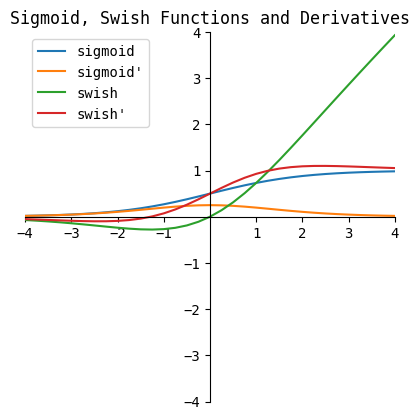

In [12]:
# create separate figure and axes objects
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
 
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
#ax.spines['bottom'].set_position('center')
 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
 
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 
# set the ticklabels and remove the 0,0 labels
ticks = list(range(min_x, max_x + 1))
ticks = [i for i in ticks if i != 0]
ax.xaxis.set_ticks(ticks)
ax.yaxis.set_ticks(ticks)
 
# set the ranges for the plot axes to reach - make square
plt.axis('square')
plt.xlim(min_x,max_x)
plt.ylim(min_x,max_x)
 
# plot all the curves
plt.plot(inputs, outs_sigmoid,   label="sigmoid")
plt.plot(inputs, outs_sigmoid_d, label="sigmoid'")
plt.plot(inputs, outs_swish,     label="swish")
plt.plot(inputs, outs_swish_d,   label="swish'")
 
# show the plot and legend
plt.title("Sigmoid, Swish Functions and Derivatives")
plt.legend(loc="upper left")
#plt.savefig(img_dir / "activation_functions_swish_sigmoid_square.png")
plt.show()

### Derivatives of Sigmoid

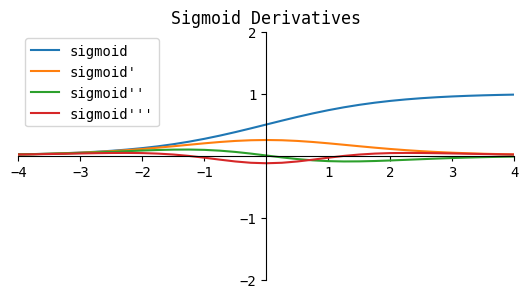

In [13]:
# create separate figure and axes objects
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# set the ticklabels and remove the 0,0 labels
ticks = list(range(min_x, max_x + 1))
ticks = [i for i in ticks if i != 0]
ax.xaxis.set_ticks(ticks)
ax.yaxis.set_ticks(ticks)

# set the ranges for the plot axes to reach - make square
plt.axis('square')
plt.xlim(min_x,max_x)
plt.ylim(-2,2)

# plot all the curves
plt.plot(inputs, outs_sigmoid,     label="sigmoid")
plt.plot(inputs, outs_sigmoid_d,   label="sigmoid'")
plt.plot(inputs, outs_sigmoid_dd,  label="sigmoid''")
plt.plot(inputs, outs_sigmoid_ddd, label="sigmoid'''")

# show the plot and legend
plt.title("Sigmoid Derivatives")
plt.legend(loc="upper left")
plt.savefig(img_dir / "activation_functions_sigmoid_derivatives.png")
plt.show()

### tanh and improved tanh activation functions

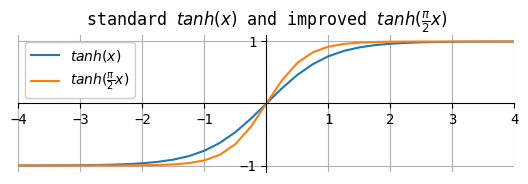

In [14]:
# create separate figure and axes objects
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
 
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
#ax.spines['bottom'].set_position('center')
 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
 
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 
# set the ticklabels and remove the 0,0 labels
ticks = list(range(min_x, max_x + 1))
ticks = [i for i in ticks if i != 0]
ax.xaxis.set_ticks(ticks)
ax.yaxis.set_ticks(ticks)
 
# set the ranges for the plot axes to reach - make square
plt.axis('square')
plt.xlim(min_x,max_x)
plt.ylim(-1.1,1.1)
 
# plot all the curves
plt.plot(inputs, outs_tanh,     label=r"$tanh(x)$")
plt.plot(inputs, outs_tanh_imp, label=r"$tanh(\frac{\pi}{2}x)$")
 
# show the plot and legend
plt.title(r"standard $tanh(x)$ and improved $tanh(\frac{\pi}{2}x)$")
plt.legend(loc="upper left", framealpha=1.0)
plt.grid()
#plt.savefig(img_dir / "activation_functions_tanh.png")
plt.show()